In [1]:
import pandas as pd
import pickle
from tqdm import tqdm
tqdm.pandas()

In [2]:
DIR_new = 'C:\\Users\\jesse\\Desktop\\Honors Project\\'

# with open(DIR_new+ 'ya_reviews.pkl', 'rb') as f:
#     reviews = pickle.load(f)

with open(DIR_new+ 'tester_ya_set.pkl', 'rb') as f:
    reviews = pickle.load(f)

In [3]:
from langdetect import detect
from langdetect import DetectorFactory

DetectorFactory.seed = 0

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

mask = reviews['review_text'].apply(is_english)

# Use the mask to filter out non-English reviews
reviews = reviews[mask]

In [4]:
# tester_ya_set = reviews.sample(frac = 0.1, random_state=42)
# tester_ya_set.info()

In [6]:
#write to pickle
# with open(DIR_new + 'tester_ya_set.pkl', 'wb') as f:
#     pickle.dump(tester_ya_set, f)

NameError: name 'tester_ya_set' is not defined

## Tester set with existing methods

### Text2Emotion and NRCLex

Testing two already-made models on a small dataset of only 10 entries for comparison

In [7]:
tester = reviews.head(10)
tester = tester.drop(columns=['n_votes','n_comments','all_caps','rating'])
from nrclex import NRCLex as nrc
import text2emotion as te

tester['review_text_lemmatized'] = tester['review_text_lemmatized'].astype(str)
tester['nrclex'] = tester['review_text_lemmatized'].progress_apply(lambda text: nrc(text).affect_frequencies)

tester['text2emotion'] = tester['review_text_lemmatized'].progress_apply(lambda x: te.get_emotion(x))

tester

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


,book_id,review_id,review_text,review_text_lemmatized,tokenized,bigrams,trigrams,nrclex,text2emotion
913969,6319176,618784590699faec2212bc6653d1c6ff,"Or in this case, too dark, depressing and unap...",or in this case too dark depressing and unappe...,"[case, dark, depressing, unappealing, finish]","[(case, dark), (dark, depressing), (depressing...","[(case, dark, depressing), (dark, depressing, ...","{'fear': 0.14285714285714285, 'anger': 0.0, 'a...","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
1320474,16045296,75b72a283d940738efd8bafc8a31c90d,From his pocket he whips out a red lollipop - ...,from his pocket he whip out a red lollipop one...,"[pocket, whip, red, lollipop, fancy, cracker, ...","[(pocket, whip), (whip, red), (red, lollipop),...","[(pocket, whip, red), (whip, red, lollipop), (...","{'fear': 0.037037037037037035, 'anger': 0.0462...","{'Happy': 0.22, 'Angry': 0.02, 'Surprise': 0.1..."
1749344,30237061,2110f248f1607caf42e7bffba1ebc90a,DNF. I really wanted to like this but some thi...,dnf i really want to like this but some thing ...,"[dnf, really, want, like, bug, begin, not, fee...","[(dnf, really), (really, want), (want, like), ...","[(dnf, really, want), (really, want, like), (w...","{'fear': 0.05263157894736842, 'anger': 0.05263...","{'Happy': 0.18, 'Angry': 0.0, 'Surprise': 0.06..."
71534,1522147,63c0ebc541452a0c5ab69d1a393a3726,This was an okay read about a girl who had bee...,this be an okay read about a girl who have be ...,"[okay, convict, killing, best, friend, ten, re...","[(okay, convict), (convict, killing), (killing...","[(okay, convict, killing), (convict, killing, ...","{'fear': 0.14285714285714285, 'anger': 0.14285...","{'Happy': 0.3, 'Angry': 0.0, 'Surprise': 0.2, ..."
2276714,10836471,9f6f5764ef624e8fa8f9b88bea4e0ec8,I enjoyed this a lot but find it insane that a...,i enjoy this a lot but find it insane that a b...,"[enjoy, insane, win, prize, young, adult, ligh...","[(enjoy, insane), (insane, win), (win, prize),...","[(enjoy, insane, win), (insane, win, prize), (...","{'fear': 0.09090909090909091, 'anger': 0.09090...","{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25..."
1318712,16143347,8737981a9b84855d64d0ad4353398baf,Books like this just kill me. \n I went into t...,book like this just kill me i go into this boo...,"[like, kill, really, nothing, knew, 50, reques...","[(like, kill), (kill, really), (really, nothin...","[(like, kill, really), (kill, really, nothing)...","{'fear': 0.05555555555555555, 'anger': 0.0, 'a...","{'Happy': 0.4, 'Angry': 0.1, 'Surprise': 0.1, ..."
2105086,18196040,c7cef9d28e94dc568c021831a7e5e046,** spoiler alert ** \n Liked that it had a hap...,spoiler alert like that it have a happy end,"[spoiler, alert, like, happy, end]","[(spoiler, alert), (alert, like), (like, happy...","[(spoiler, alert, like), (alert, like, happy),...","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.5, ..."
722208,5996153,2b85b23fee9b8ec78369c988c32adc24,This book really upset me a lot. A few good po...,this book really upset me a lot a few good poi...,"[really, upset, good, point, love, meeting, da...","[(really, upset), (upset, good), (good, point)...","[(really, upset, good), (upset, good, point), ...","{'fear': 0.05555555555555555, 'anger': 0.13888...","{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.08..."
1041024,31145148,6304393cd2ae2b4dcd50f0441c4b137e,3.5 stars. \n Why can't Goodreads allow us to ...,35 star why can not goodreads allow u to rate ...,"[35, not, goodreads, allow, u, rate, half, ann...","[(35, not), (not, goodreads), (goodreads, allo...","[(35, not, goodreads), (not, goodreads, allow)...","{'fear': 0.0, 'anger': 0.1, 'anticip': 0.0, 't...","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
2272544,8709526,a1a33c623f52e90e1da63fd5727a70d7,Sydney and Adrian - finally! :),sydney and adrian finally !,"[sydney, adrian, finally, !]","[(sydney, adrian), (adrian, finally), (finally...","[(sydney, adrian, finally), (adrian, finally, 

These methods arent a great fit because their emotions arent in line with the emotions felt from reading, and dont accurately capture the sentiment. E.g, "Exciting, fun, entertaining" was scored alright with NRClex by identifying the primary emotions as positivie, joy, and anticipation, but also identified "I read this book because my fifth grade son was required to for school. I'm so glad I did! I experienced a range of emotions & just loved it. Glad these middle schoolers are being exposed to the topics discussed in the book." as negative and anticipation which doesnt make a ton of sense. Alternatively, the emotions from text 2 emotion werent diverse enough, and miscategorized things to some degree -- not sure why exciting fun and entertaining is 50% sad?

### Using Lexicon - "Emotion Based Literature Classification"

In [8]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# with open('emotions.txt', 'r') as file:
#     with open('lemmatized_emotions.txt', 'w') as outfile:
#         for line in file:
#             clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
#             word, emotion = clear_line.split(':')
#             lemmatized_word = lemmatizer.lemmatize(word, pos='v')
#             outfile.write(f"'{lemmatized_word}': '{emotion.strip()}',\n")

In [9]:
def cleantokens(tokens):
    final_words = []
    for word in tokens:
        final_words.append(word)
    text = ''
    for word in final_words:
        text = text + word + ' '
    return text

def cleangrams(gram_list):
    [' '.join(gram) for gram in gram_list]

tester['token_review_text'] = tester['tokenized'].progress_apply(lambda x: cleantokens(x))

100%|██████████| 10/10 [00:00<00:00, 9969.82it/s]


In [10]:
import regex as re

from collections import Counter

def getEmotion(text, returnType):
    emotion_list = []
    with open('lemmatized_emotions.txt', 'r') as file:
        for line in file:
            clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
            word, emotion = clear_line.split(':')
            for text_word in text.split(" "):
                #print(text_word)
                if text_word and not text_word.isspace() and not text_word.startswith(('*', '+')) and re.match(word, text_word):
                    emotion_list.append(emotion)

    w = Counter(emotion_list)
    subset = w.most_common(30)

    if returnType == "list":
        return subset
    elif returnType == "counter":
        return w
    else:
        return emotion_list

In [11]:
tester['lex_txt_emotions'] = tester['token_review_text'].progress_apply(lambda x: getEmotion(x, "list"))

100%|██████████| 10/10 [00:02<00:00,  3.75it/s]


This approach worked well, but I disagree with the emotions being used. Lutan and Badica rely on a framework of 35 emotions designed from a twitter emotion analysis study, but they dont align with the nuance of book reviews. However, this approach itself is a good option.

### TFIDF Approach

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english', ngram_range=(1,1))
tfidf_matrix = tfidf.fit_transform(reviews['review_text_lemmatized'])

In [17]:
print([tfidf_matrix[1,tfidf.vocabulary_['love']]])

[0.03739540339815773]


Low tfidf indicates a less rare word

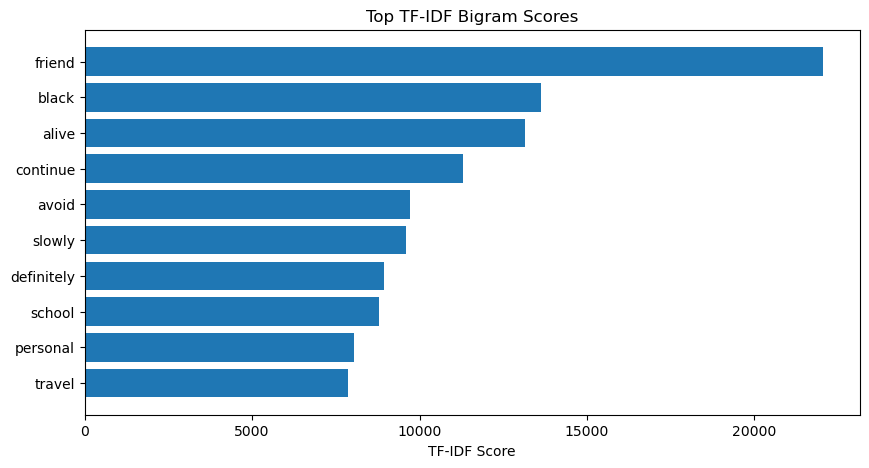

In [18]:
import numpy as np

total_scores = np.sum(tfidf_matrix, axis=0)
total_scores = np.ravel(total_scores)

feature_names = list(tfidf.vocabulary_.keys())
scores_with_bigrams = list(zip(feature_names, total_scores))

N = 10  # or any other number you prefer
top_scores = sorted(scores_with_bigrams, key=lambda x: x[1], reverse=True)[:N]

import matplotlib.pyplot as plt

bigrams, scores = zip(*top_scores)
plt.figure(figsize=(10, 5))
plt.barh(bigrams, scores)
plt.xlabel('TF-IDF Score')
plt.title('Top TF-IDF Bigram Scores')
plt.gca().invert_yaxis()
plt.show()

Not super helpful either. Resources restricting use of machine learning, so going to use lexicon.